In [1]:
from WindPy import w
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
data = w.wsd('881001.WI,801821.SI,801823.SI', 'close', '2000-01-01', '2018-04-13')

In [4]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df = df.dropna()

In [7]:
df.head()

,881001.WI,801821.SI,801823.SI
2000-01-04,1031.0334,1034.44,1025.33
2000-01-05,1034.4385,1039.64,1028.25
2000-01-06,1076.5120,1079.15,1071.80
2000-01-07,1117.7781,1111.93,1118.81
2000-01-10,1141.0309,1141.18,1137.34


In [40]:
ret_df = df.pct_change(periods=60)

In [41]:
ret_df['diff'] = ret_df['801823.SI'] - ret_df['801821.SI']

In [42]:
vol = df['881001.WI'].pct_change().rolling(window=60).std()

In [43]:
vol.index = pd.to_datetime(vol.index)

In [44]:
# print vol.resample('M').last()
# print ret_df['diff'].resample('M').last()
v = vol.resample('M').last()
r = ret_df['diff'].resample('M').last()

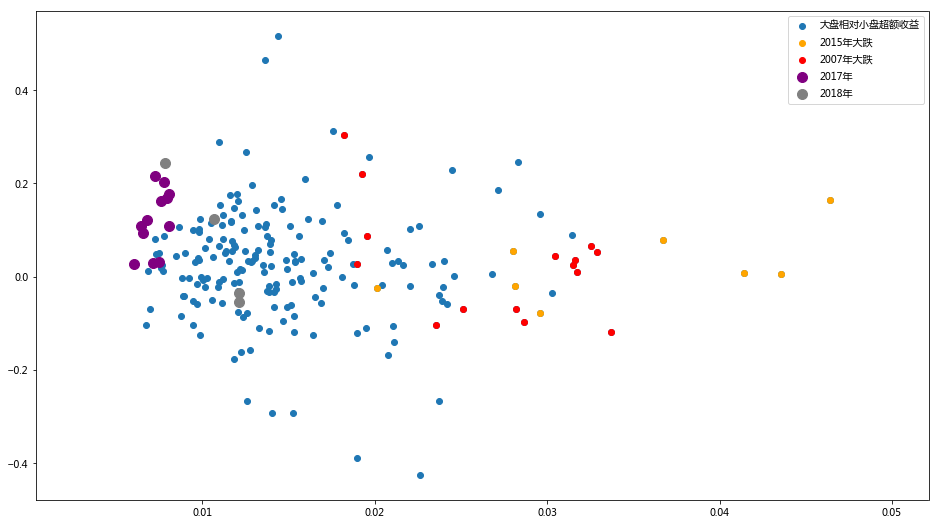

In [45]:
plt.figure(figsize=(16, 9))
plt.scatter(v, r, label=u'大盘相对小盘超额收益')
plt.scatter(v[(v.index >= '2015-06-01') & (v.index <= '2016-02-01')], r[(r.index >= '2015-06-01') & (r.index <= '2016-02-01')], label=u'2015年大跌', color='orange')
plt.scatter(v[(v.index >= '2007-09-01') & (v.index <= '2008-12-01')], r[(r.index >= '2007-09-01') & (r.index <= '2008-12-01')], label=u'2007年大跌', color='red')
plt.scatter(v[(v.index >= '2017-01-01') & (v.index <= '2018-01-01')], r[(r.index >= '2017-01-01') & (r.index <= '2018-01-01')], label=u'2017年', color='purple', s=100)
plt.scatter(v[(v.index >= '2018-01-01') & (v.index <= '2018-05-01')], r[(r.index >= '2018-01-01') & (r.index <= '2018-05-01')], label=u'2018年', color='gray', s=100)
plt.legend()